# **Solar Data Discovery** 

### **Sierraleone Data Profiling, Cleaning, and EDA**

In [1]:
import sys
import os
import matplotlib as plt
import importlib
system_path = os.path.abspath('..')
if system_path in sys.path:
    print('Path already exist')
else:
    sys.path.append(system_path)

In [2]:
%load_ext autoreload
%autoreload 2
import importlib
from scripts import data_analysis
importlib.reload(data_analysis)


<module 'scripts.data_analysis' from 'd:\\10Acadamy\\New 10 Acadamy\\solar-challenge-week1\\scripts\\data_analysis.py'>

In [3]:
data = data_analysis.load_data('../data/sierraleone-bumbuna.csv')

In [4]:
data

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-10-30 00:01,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.1,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
1,2021-10-30 00:02,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
2,2021-10-30 00:03,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
3,2021-10-30 00:04,-0.7,0.0,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.1,22.3,22.6,NaN
4,2021-10-30 00:05,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525595,2022-10-29 23:56,-1.6,-0.1,-2.9,0.0,0.0,24.0,100.0,0.0,0.0,0.0,0.0,0.0,999,0,0.0,24.2,24.5,NaN
525596,2022-10-29 23:57,-1.7,-0.1,-3.0,0.0,0.0,24.0,100.0,0.0,0.0,0.0,0.0,0.0,999,0,0.0,24.2,24.5,NaN
525597,2022-10-29 23:58,-1.7,-0.1,-3.1,0.0,0.0,24.0,100.0,0.0,0.0,0.0,0.0,0.0,1000,0,0.0,24.1,24.4,NaN
525598,2022-10-29 23:59,-1.7,-0.2,-3.3,0.0,0.0,23.9,100.0,0.0,0.0,0.0,0.0,0.0,1000,0,0.0,24.1,24.4,NaN


In [5]:
from scripts.data_analysis import *

# Check for missing values
missing_values = check_missing_values(data)
print("Missing Values Count:")
print(missing_values)

# Specify columns for cleaning and outlier detection
columns_to_check = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']

# Clean the data
cleaned_df = clean_data(data, columns_to_check)

# Print cleaned data info
print("\nCleaned Data Summary:")
print(cleaned_df.describe())

Missing Values Count:
Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64

Cleaned Data Summary:
                 GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      201.957515     116.376337     113.720571     206.643095   
std       298.495150     218.652659     158.946032     300.896893   
min       -19.500000      -7.800000     -17.900000       0.000000   
25%        -2.800000      -0.300000      -3.800000       0.000000   
50%         0.300000      -0.100000      -0.100000       3.600000   
75%

In [6]:
# Specify columns for Z-score computation and cleaning
columns_to_check = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']

# Clean the data
cleaned_df = clean_data(data, columns_to_check)

# Compute Z-scores
z_scores = compute_z_scores(cleaned_df, columns_to_check)

# Flag outliers
outlier_flags = flag_outliers(z_scores)

# Print flagged rows
print("\nFlagged Outlier Rows:")
print(cleaned_df[outlier_flags])


Flagged Outlier Rows:
               Timestamp    GHI    DNI    DHI   ModA   ModB  Tamb    RH   WS  \
653     2021-10-30 10:54  814.0  257.0  594.3  878.0  856.0  25.9  85.3  0.5   
654     2021-10-30 10:55  826.0  263.5  599.6  883.0  861.0  26.0  85.4  1.7   
655     2021-10-30 10:56  851.0  285.0  605.9  912.0  890.0  26.0  84.2  1.6   
656     2021-10-30 10:57  823.0  254.8  603.9  878.0  856.0  26.0  85.3  0.8   
657     2021-10-30 10:58  810.0  244.5  598.8  864.0  843.0  26.1  85.7  0.6   
...                  ...    ...    ...    ...    ...    ...   ...   ...  ...   
522184  2022-10-27 15:05  167.2   -0.5  165.1  167.6  160.9  30.4  68.3  5.3   
522185  2022-10-27 15:06  163.4   -0.6  161.0  165.7  159.2  30.2  67.7  7.1   
522194  2022-10-27 15:15  183.5    0.3  181.6  173.7  168.7  29.3  70.2  4.9   
523792  2022-10-28 17:53   31.3   -0.5   30.2   34.3   32.3  28.4  79.5  5.0   
523794  2022-10-28 17:55   22.8   -0.8   21.4   26.5   25.0  27.9  80.4  5.0   

        WSgust  

## Exporting The Ceaned Dataset and saving as sierraleone_clean.csv

In [7]:
cleaned_df.to_csv("../data/sierraleone_clean.csv", index =False)

In [8]:
import matplotlib.pyplot as plt
print(cleaned_df.columns)

Index(['Timestamp', 'GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS',
       'WSgust', 'WSstdev', 'WD', 'WDstdev', 'BP', 'Cleaning', 'Precipitation',
       'TModA', 'TModB', 'Comments'],
      dtype='object')


# Time Series Analysis
## Line charts of GHI, DNI, DHI, Tamb vs. Timestamp. with script call

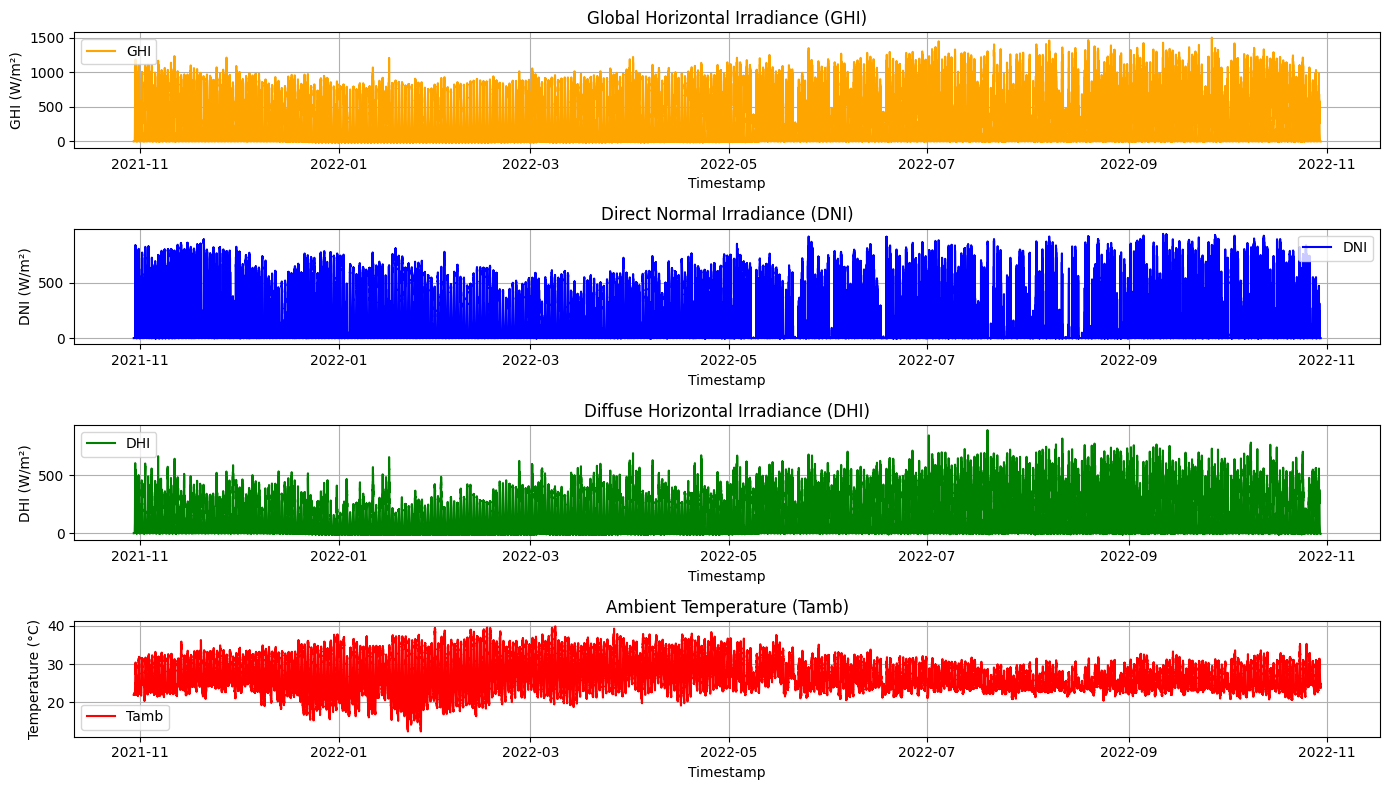

In [9]:
plot_time_series(cleaned_df)

# Time Series Analysis
## Observe patterns by month, trends throughout day, or anomalies, such as peaks in solar irradiance or temperature fluctuations.

d:\10Acadamy\New 10 Acadamy\solar-challenge-week1\scripts\data_analysis.py:105: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = df.resample('M').mean()


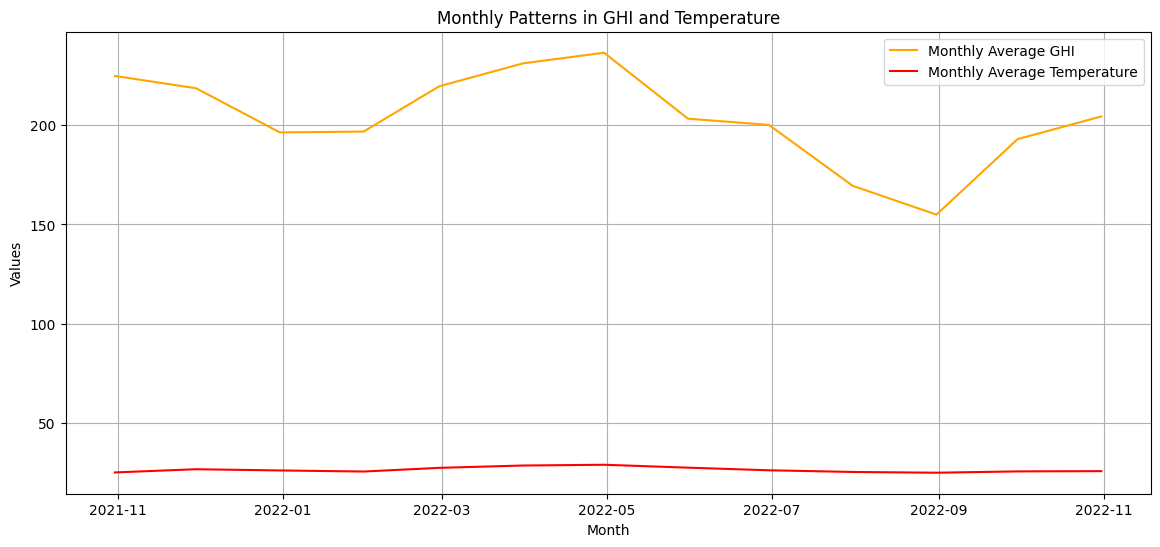

In [10]:
plot_monthly_patterns(cleaned_df)

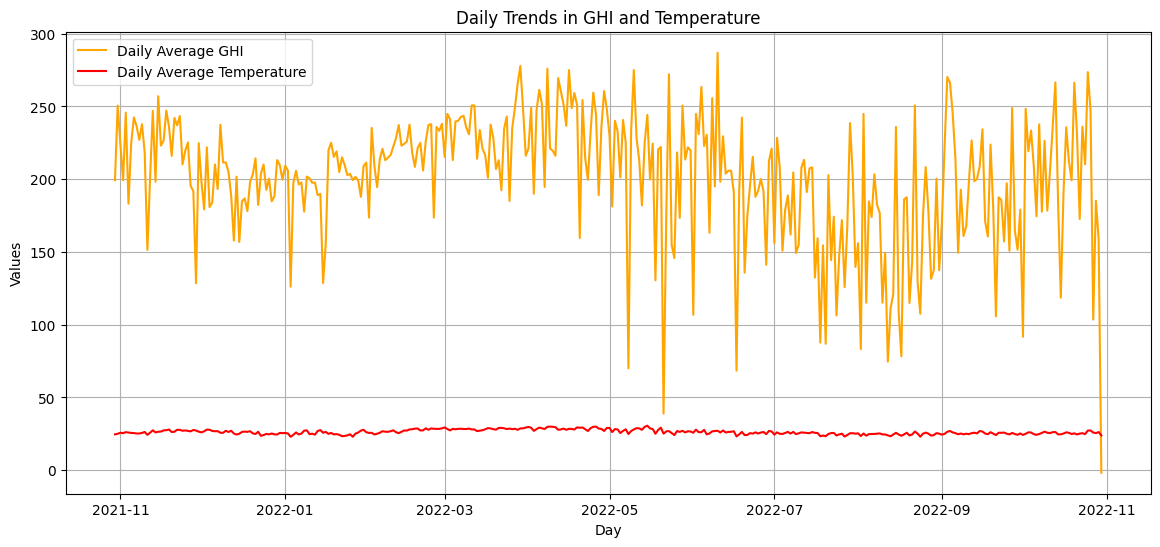

In [11]:
plot_daily_trends(cleaned_df)

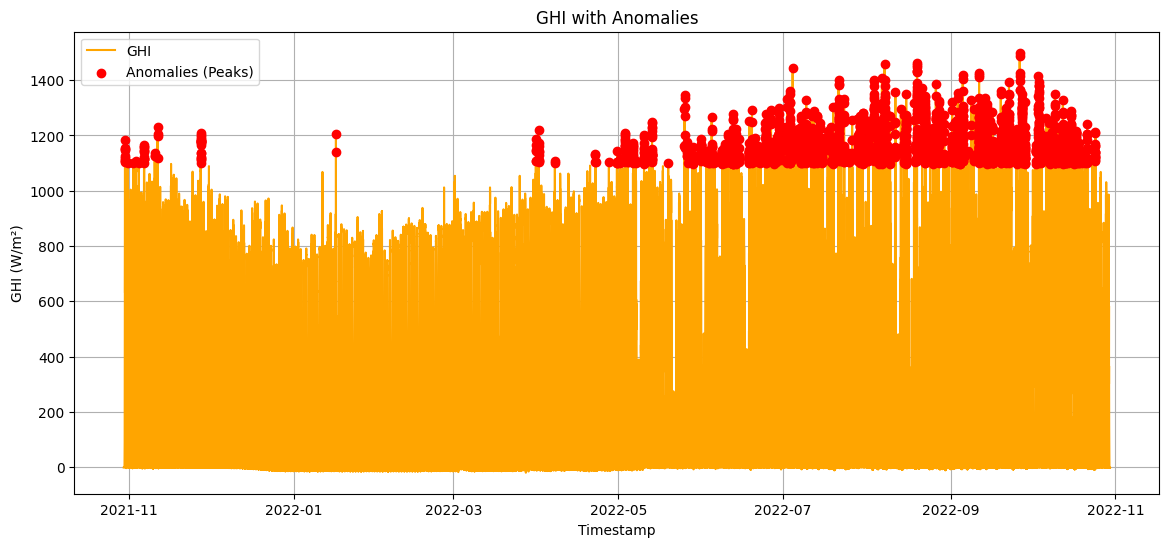

In [12]:
detect_anomalies(cleaned_df)

Available columns: Index(['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS', 'WSgust',
       'WSstdev', 'WD', 'WDstdev', 'BP', 'Cleaning', 'Precipitation', 'TModA',
       'TModB', 'Comments'],
      dtype='object')


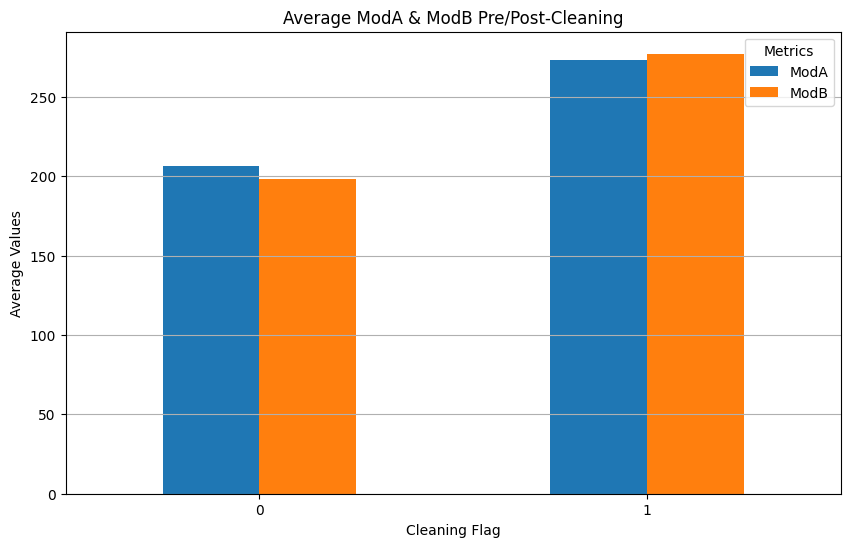

In [13]:
plot_cleaning_impact(cleaned_df)

# Correlation & Relationship Analysis

## Heatmap of correlations (GHI, DNI, DHI, TModA, TModB).

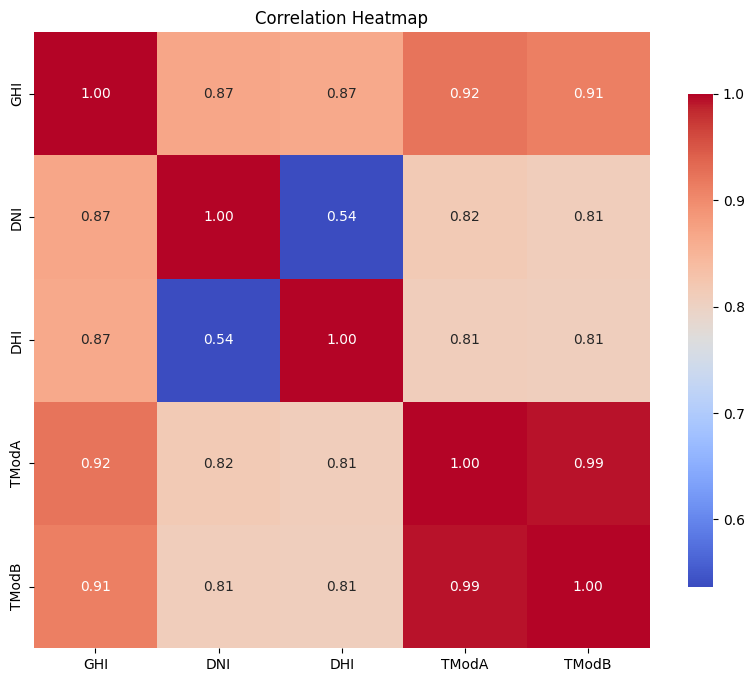

In [14]:
plot_correlation_heatmap(cleaned_df)

## Scatter plots: WS, WSgust, WD vs. GHI; RH vs. Tamb or RH vs. GHI.

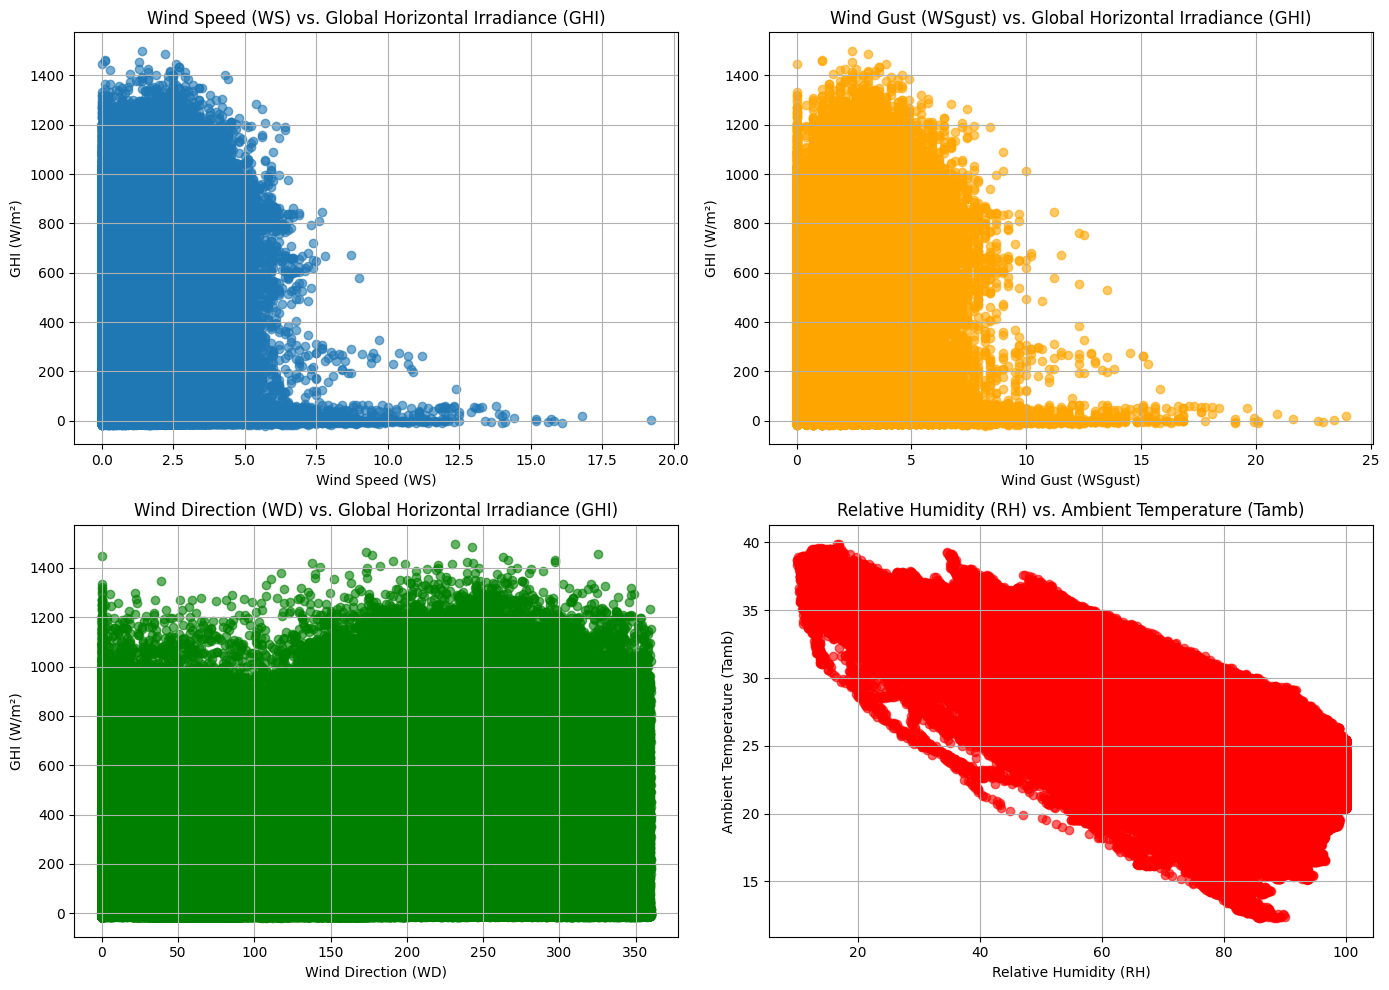

In [15]:
plot_scatter_plots(cleaned_df)

# Wind & Distribution Analysis
## Wind rose or radial bar plot of WS/WD.

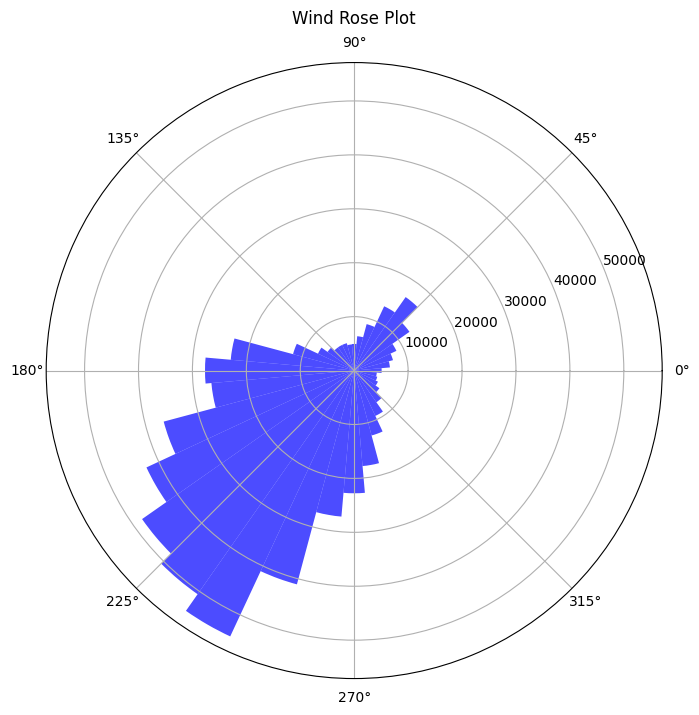

In [16]:
plot_wind_rose(cleaned_df)

# Wind & Distribution Analysis
## Histograms for GHI and one other variable (e.g. WS).

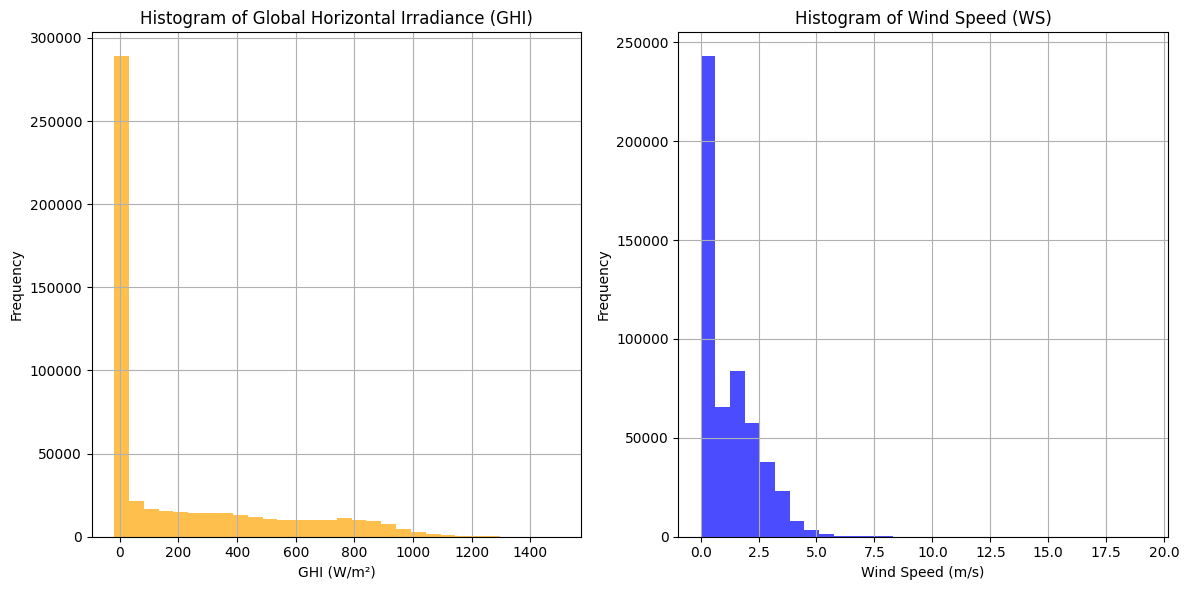

In [17]:
plot_histograms(cleaned_df)

# Temperature Analysis
## Examine how relative humidity (RH) might influence temperature readings and solar radiation.


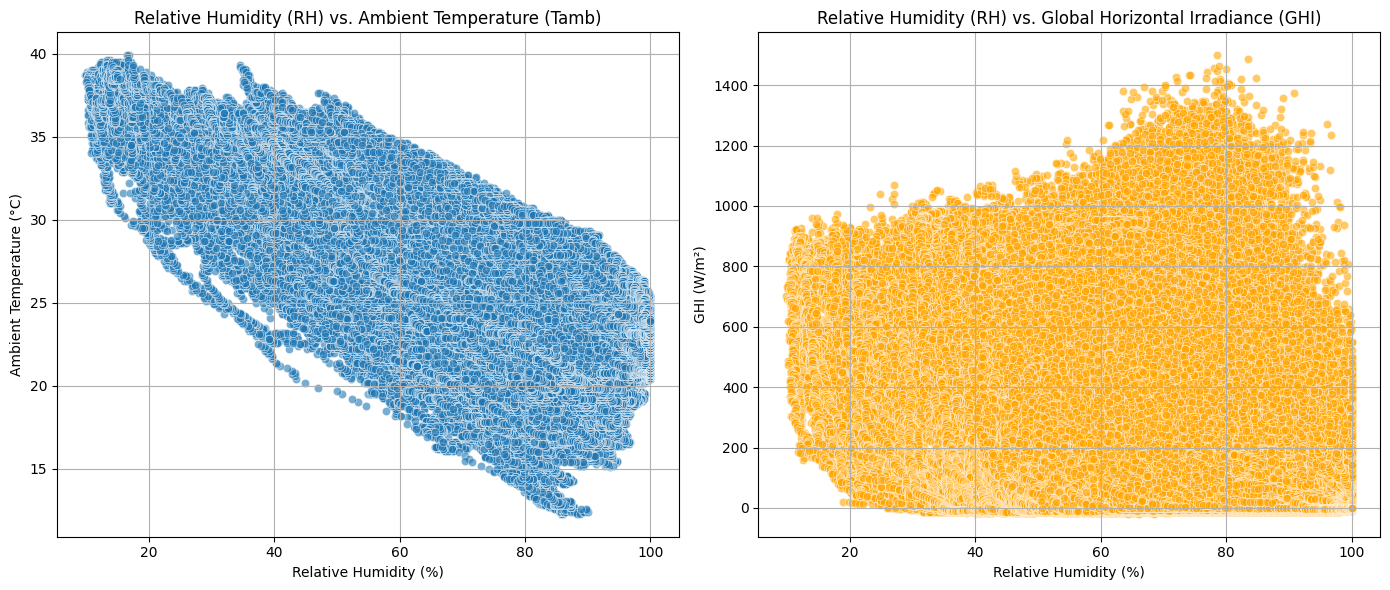

In [18]:
plot_relationships(cleaned_df)

In [19]:
calculate_correlations(cleaned_df)

Correlation between RH and Tamb: -0.79
Correlation between RH and GHI: -0.55


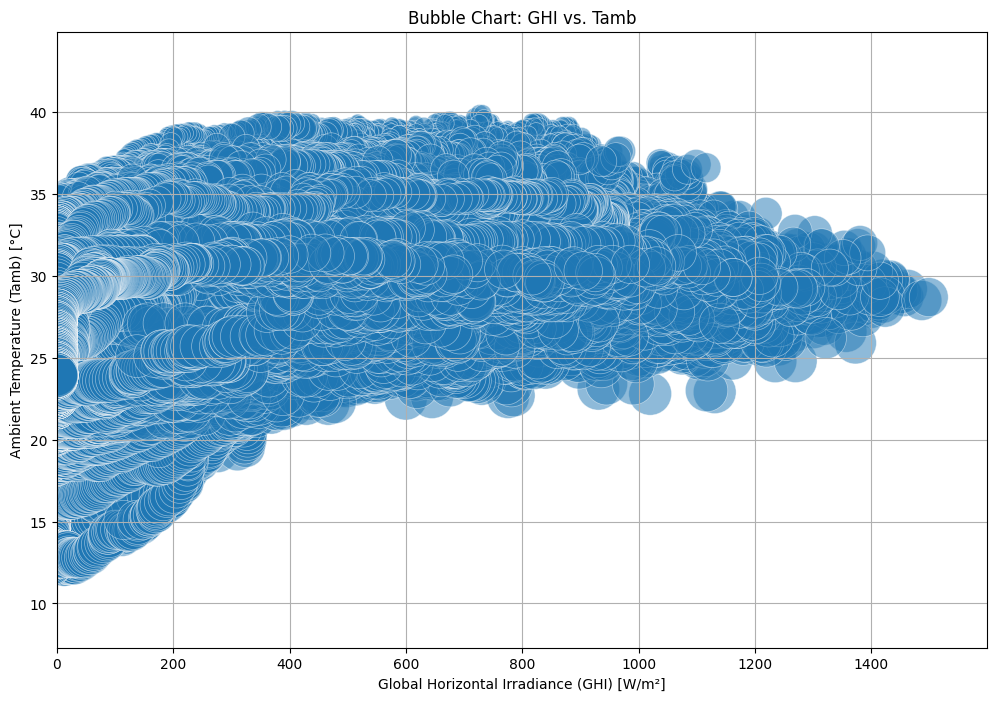

In [20]:
plot_bubble_chart(cleaned_df)